# look at driving_log.csv

In [13]:
# imports
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import model as md
%matplotlib inline

In [4]:
# globals
FILE_DIR = '../data/'
LOG_FILE = 'm_driving_log.csv'

In [5]:
# open the csv file
df = pd.read_csv(FILE_DIR+LOG_FILE)
df.head(1)

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.14829


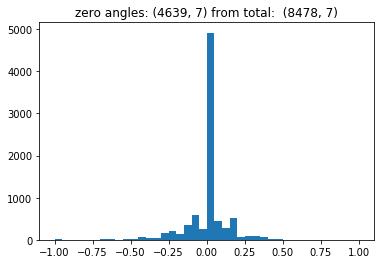

In [10]:
# ok let's histogram it
plt.hist(df['steering'],bins=40)
plt.title('zero angles: {0} from total:  {1}'.format(df[df['steering'] == 0].shape, df.shape))
plt.show()

In [29]:
# imitate the model generator for training data
train_data, validation_data = train_test_split(df, test_size=0.2)
train_generator = md.img_generator(train_data, batch_size=32)

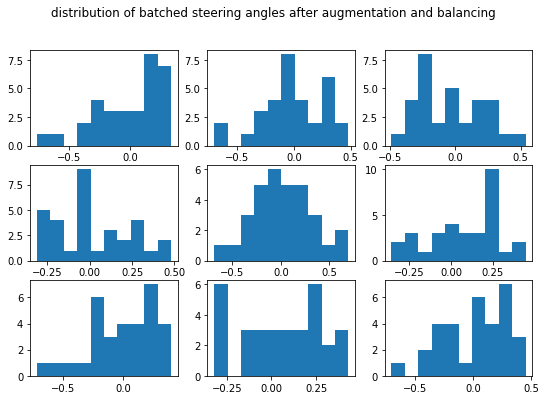

In [33]:
# create a plot of histograms showing how each training batch is distributed for steering angles
fig, ax = plt.subplots(3,3, figsize=(9,6))
r = 0
c = 0   
for i in range(9):
    X, y = train_generator.__next__()
    if c == 3:
        c = 0
        r += 1
    ax[r,c].hist(y)
    c += 1
plt.suptitle('distribution of batched steering angles after augmentation and balancing')
plt.show()

In [34]:
# ok let's try some transformations
def normalise_img(img):
    """ x / 255 -1 """
    return (img / 255 - 1)

def get_points(img, angle):
    angle = 1.5708 * angle - 1.5708
    pt1 = (np.int_(np.floor(img.shape[1]/2)),img.shape[0])
    pt2 = (np.int_(np.floor(pt1[0] + (50 * np.cos(angle)))),np.int_(np.floor(pt1[1] + (50 * np.sin(angle)))))
    return pt1, pt2

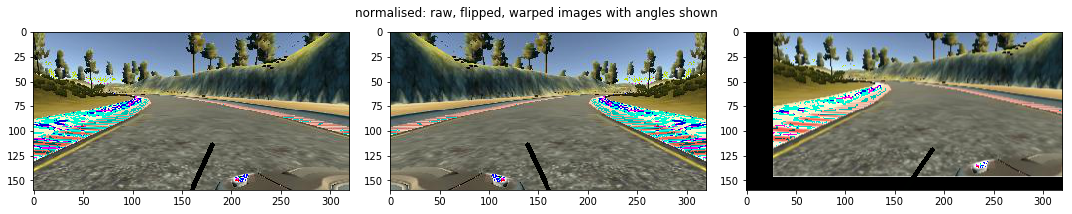

In [47]:
# show one image as normal, flipped and warped
fig, ax = plt.subplots(1,3, figsize=(15,3))
for i in range(3):
    img = X[0]
    angle = y[0]
    img = normalise_img(img)
    if i == 1: img, angle = md.flip_image(img, angle)
    if i == 2: img, angle = md.warp_image(img, angle)
    pt1, pt2 = get_points(img, angle)
    ax[i].imshow(cv2.line(img, pt1, pt2, (0,255,0), thickness=4))
plt.suptitle('normalised: raw, flipped, warped images with angles shown')
plt.tight_layout()
plt.show()